In [1]:
## Convert the date to datetime
### Then try to a machine learning model based on averages? 
## Want to know if Human Development Index Score plays a role in the likelihood of a country receiving vaccinations 
### Generate a machine learning model to predict the number of vaccinations based on conutries HDI (Human Development Index)
## X: human_development_index
## Y: Total Vaccinations

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
covid_19_df = pd.read_csv('Project Resources/covid_map_data.csv')
covid_19_df.head(5)

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Albania,ALB,01/10/2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,01/11/2021,NaN,NaN,NaN,NaN,64.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,01/12/2021,128.0,128.0,NaN,NaN,64.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,01/13/2021,188.0,188.0,NaN,60.0,63.0,0.01,0.01,...,65334.0,707.0,4.0,104.871,11803.431,0.0,10.08,2.89,78.57,0.795
4,Albania,ALB,01/14/2021,266.0,266.0,NaN,78.0,66.0,0.01,0.01,...,65994.0,660.0,5.0,104.871,11803.431,0.0,10.08,2.89,78.57,0.795


In [4]:
covid_19_df.fillna(0)

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Albania,ALB,01/10/2021,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,0.000
1,Albania,ALB,01/11/2021,0.0,0.0,0.0,0.0,64.0,0.00,0.00,...,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,0.000
2,Albania,ALB,01/12/2021,128.0,128.0,0.0,0.0,64.0,0.00,0.00,...,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,0.000
3,Albania,ALB,01/13/2021,188.0,188.0,0.0,60.0,63.0,0.01,0.01,...,65334.0,707.0,4.0,104.871,11803.431,0.000,10.08,2.89,78.57,0.795
4,Albania,ALB,01/14/2021,266.0,266.0,0.0,78.0,66.0,0.01,0.01,...,65994.0,660.0,5.0,104.871,11803.431,0.000,10.08,2.89,78.57,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,Zimbabwe,ZWE,02/20/2021,0.0,0.0,0.0,0.0,328.0,0.00,0.00,...,35768.0,58.0,2.0,42.729,1899.775,36.791,1.82,1.70,61.49,0.571
4276,Zimbabwe,ZWE,02/21/2021,0.0,0.0,0.0,0.0,328.0,0.00,0.00,...,35796.0,28.0,4.0,42.729,1899.775,36.791,1.82,1.70,61.49,0.571
4277,Zimbabwe,ZWE,02/22/2021,1314.0,1314.0,0.0,0.0,328.0,0.01,0.01,...,35862.0,66.0,5.0,42.729,1899.775,36.791,1.82,1.70,61.49,0.571
4278,Zimbabwe,ZWE,02/23/2021,4041.0,4041.0,0.0,2727.0,808.0,0.03,0.03,...,35910.0,48.0,7.0,42.729,1899.775,36.791,1.82,1.70,61.49,0.571


In [5]:
final_df = covid_19_df.drop(columns=["people_fully_vaccinated", "total_vaccinations_per_hundred", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred", "daily_vaccinations_per_million", "Note", "new_cases", "new_deaths", "handwashing_facilities", "hospital_beds_per_thousand", "Country", "Status", "diabetes_prevalence", "life_expectancy"])
            


In [6]:
final_df.head()

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_y,people_vaccinated_y,total_deaths,total_cases,population_density,gdp_per_capita,human_development_index
0,Albania,ALB,01/10/2021,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,01/11/2021,NaN,NaN,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,01/12/2021,128.0,128.0,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,01/13/2021,188.0,188.0,60.0,63.0,188.0,188.0,1256.0,65334.0,104.871,11803.431,0.795
4,Albania,ALB,01/14/2021,266.0,266.0,78.0,66.0,266.0,266.0,1261.0,65994.0,104.871,11803.431,0.795


In [7]:
final_df.fillna(0)

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_y,people_vaccinated_y,total_deaths,total_cases,population_density,gdp_per_capita,human_development_index
0,Albania,ALB,01/10/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
1,Albania,ALB,01/11/2021,0.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
2,Albania,ALB,01/12/2021,128.0,128.0,0.0,64.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
3,Albania,ALB,01/13/2021,188.0,188.0,60.0,63.0,188.0,188.0,1256.0,65334.0,104.871,11803.431,0.795
4,Albania,ALB,01/14/2021,266.0,266.0,78.0,66.0,266.0,266.0,1261.0,65994.0,104.871,11803.431,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,Zimbabwe,ZWE,02/20/2021,0.0,0.0,0.0,328.0,0.0,0.0,1432.0,35768.0,42.729,1899.775,0.571
4276,Zimbabwe,ZWE,02/21/2021,0.0,0.0,0.0,328.0,0.0,0.0,1436.0,35796.0,42.729,1899.775,0.571
4277,Zimbabwe,ZWE,02/22/2021,1314.0,1314.0,0.0,328.0,1314.0,1314.0,1441.0,35862.0,42.729,1899.775,0.571
4278,Zimbabwe,ZWE,02/23/2021,4041.0,4041.0,2727.0,808.0,4041.0,4041.0,1448.0,35910.0,42.729,1899.775,0.571


In [ ]:
print("Hello")

In [9]:
final_df.head()
final_df.fillna(0)

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_y,people_vaccinated_y,total_deaths,total_cases,population_density,gdp_per_capita,human_development_index
0,Albania,ALB,01/10/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
1,Albania,ALB,01/11/2021,0.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
2,Albania,ALB,01/12/2021,128.0,128.0,0.0,64.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000
3,Albania,ALB,01/13/2021,188.0,188.0,60.0,63.0,188.0,188.0,1256.0,65334.0,104.871,11803.431,0.795
4,Albania,ALB,01/14/2021,266.0,266.0,78.0,66.0,266.0,266.0,1261.0,65994.0,104.871,11803.431,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,Zimbabwe,ZWE,02/20/2021,0.0,0.0,0.0,328.0,0.0,0.0,1432.0,35768.0,42.729,1899.775,0.571
4276,Zimbabwe,ZWE,02/21/2021,0.0,0.0,0.0,328.0,0.0,0.0,1436.0,35796.0,42.729,1899.775,0.571
4277,Zimbabwe,ZWE,02/22/2021,1314.0,1314.0,0.0,328.0,1314.0,1314.0,1441.0,35862.0,42.729,1899.775,0.571
4278,Zimbabwe,ZWE,02/23/2021,4041.0,4041.0,2727.0,808.0,4041.0,4041.0,1448.0,35910.0,42.729,1899.775,0.571


In [ ]:
### X Variable: Human Development Index
### Y Variable: Total Vaccinations
final_df.dtypes

In [10]:
final_df["date"] = pd.to_datetime(final_df["date"])
final_df['date'] = final_df['date'].dt.strftime('%m/%d/%Y')
final_df.head()

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_y,people_vaccinated_y,total_deaths,total_cases,population_density,gdp_per_capita,human_development_index
0,Albania,ALB,01/10/2021,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,01/11/2021,NaN,NaN,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,01/12/2021,128.0,128.0,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,01/13/2021,188.0,188.0,60.0,63.0,188.0,188.0,1256.0,65334.0,104.871,11803.431,0.795
4,Albania,ALB,01/14/2021,266.0,266.0,78.0,66.0,266.0,266.0,1261.0,65994.0,104.871,11803.431,0.795


In [ ]:
final_df.head()

In [17]:
covid_final_df = final_df.dropna()
covid_final_df.head()

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_y,people_vaccinated_y,total_deaths,total_cases,population_density,gdp_per_capita,human_development_index
3,Albania,ALB,01/13/2021,188.0,188.0,60.0,63.0,188.0,188.0,1256.0,65334.0,104.871,11803.431,0.795
4,Albania,ALB,01/14/2021,266.0,266.0,78.0,66.0,266.0,266.0,1261.0,65994.0,104.871,11803.431,0.795
5,Albania,ALB,01/15/2021,308.0,308.0,42.0,62.0,308.0,308.0,1265.0,66635.0,104.871,11803.431,0.795
6,Albania,ALB,01/16/2021,369.0,369.0,61.0,62.0,369.0,369.0,1270.0,67216.0,104.871,11803.431,0.795
7,Albania,ALB,01/17/2021,405.0,405.0,36.0,58.0,405.0,405.0,1277.0,67690.0,104.871,11803.431,0.795


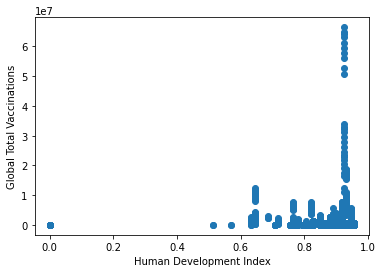

In [18]:
#### Relationship between HDI and Total Vaccinations
plt.scatter(covid_final_df.human_development_index, covid_final_df.total_vaccinations_x)
plt.xlabel("Human Development Index")
plt.ylabel("Global Total Vaccinations")
plt.show()

In [29]:
X = covid_final_df.human_development_index.values.reshape(-1,1)

In [30]:
X.shape

(1267, 1)

In [31]:
y = covid_final_df.total_vaccinations

In [32]:
model = LinearRegression()

In [26]:
covid_final_df["total_vaccinations_"] = covid_final_df["total_vaccinations_x"].astype(int)
covid_final_df.dtypes

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


location                    object
iso_code                    object
date                        object
total_vaccinations_x       float64
people_vaccinated_x        float64
daily_vaccinations_raw     float64
daily_vaccinations         float64
total_vaccinations_y       float64
people_vaccinated_y        float64
total_deaths               float64
total_cases                float64
population_density         float64
gdp_per_capita             float64
human_development_index    float64
total_vaccinations           int64
total_vaccinations_          int64
dtype: object

In [50]:
covid_final_df["total_cases"] = covid_final_df["total_cases"].astype(int)
covid_final_df.dtypes

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


location                    object
iso_code                    object
date                        object
total_vaccinations_x       float64
people_vaccinated_x        float64
daily_vaccinations_raw     float64
daily_vaccinations         float64
total_vaccinations_y       float64
people_vaccinated_y        float64
total_deaths               float64
total_cases                  int64
population_density         float64
gdp_per_capita             float64
human_development_index    float64
total_vaccinations           int64
total_vaccinations_          int64
total cases                  int64
dtype: object

In [48]:
covid_final_df.head()

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_y,people_vaccinated_y,total_deaths,total_cases,population_density,gdp_per_capita,human_development_index,total_vaccinations,total_vaccinations_,total cases
3,Albania,ALB,01/13/2021,188.0,188.0,60.0,63.0,188.0,188.0,1256.0,65334.0,104.871,11803.431,0.795,188,188,65334
4,Albania,ALB,01/14/2021,266.0,266.0,78.0,66.0,266.0,266.0,1261.0,65994.0,104.871,11803.431,0.795,266,266,65994
5,Albania,ALB,01/15/2021,308.0,308.0,42.0,62.0,308.0,308.0,1265.0,66635.0,104.871,11803.431,0.795,308,308,66635
6,Albania,ALB,01/16/2021,369.0,369.0,61.0,62.0,369.0,369.0,1270.0,67216.0,104.871,11803.431,0.795,369,369,67216
7,Albania,ALB,01/17/2021,405.0,405.0,36.0,58.0,405.0,405.0,1277.0,67690.0,104.871,11803.431,0.795,405,405,67690


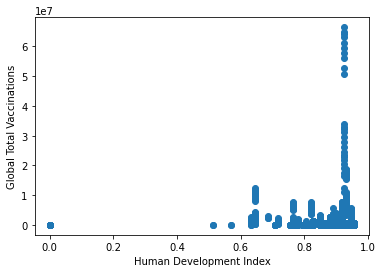

In [28]:
### Relationship Betweeen HDI and Vaccinations
plt.scatter(covid_final_df.human_development_index, covid_final_df.total_vaccinations)
plt.xlabel("Human Development Index")
plt.ylabel("Global Total Vaccinations")
plt.show()

In [33]:
model.fit(X,y)

LinearRegression()

In [34]:
y_pred = model.predict(X)
print(y_pred.shape)

(1267,)


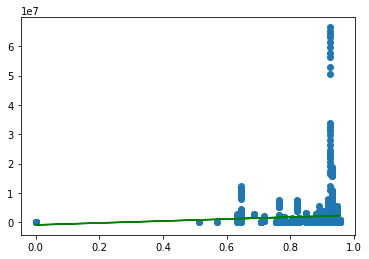

In [36]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='green')
plt.show()
### Showing very little positive correlation

In [38]:
print(model.coef_)
print(model.intercept_)

[3330264.89754985]
-920570.6047333991


In [39]:
hdi_column = covid_final_df['human_development_index']
vaccine_column = covid_final_df['total_vaccinations']

In [45]:
correlation = hdi_column.corr(vaccine_column)
correlation

0.08283955359654906

In [46]:
## The Correlation between the Human Development Index and Total Vaccinations is 8.28% This is quite surprising as I would have thought countries with a higher human development index score, the more likely they would be receiving vaccinations. It is still early in the vaccination process so this could also be a reason. 

In [53]:
print("Hi")

Hi


In [54]:
print("Hello")

Hello
